# 2차세미프로젝트 3조 강기훈 문수지 조우람

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_df = pd.read_csv('titanic.csv')
data_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
y_data = data_df[['Survived']]
y_data.head(3)

,Survived
0,0
1,1
2,1


In [5]:
del data_df['Survived']
x_data = data_df.copy()
x_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
# (1) 열 삭제

del data_df['PassengerId'] 
del data_df['Ticket']
del data_df['Cabin']

# (2) 성별(Sex) 값
data_df.loc[data_df["Sex"]=='male', 'Sex'] = 0
data_df.loc[data_df["Sex"]=='female', 'Sex'] = 1

data_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [7]:
data_df.isnull().sum() 

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
#(3-2) Fare==0 인것을 결측치로 보기 (총15개)

data_df[data_df['Fare']==0]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
179,3,"Leonard, Mr. Lionel",0,36.0,0,0,0.0,S
263,1,"Harrison, Mr. William",0,40.0,0,0,0.0,S
271,3,"Tornquist, Mr. William Henry",0,25.0,0,0,0.0,S
277,2,"Parkes, Mr. Francis ""Frank""",0,NaN,0,0,0.0,S
302,3,"Johnson, Mr. William Cahoone Jr",0,19.0,0,0,0.0,S
413,2,"Cunningham, Mr. Alfred Fleming",0,NaN,0,0,0.0,S
466,2,"Campbell, Mr. William",0,NaN,0,0,0.0,S
481,2,"Frost, Mr. Anthony Wood ""Archie""",0,NaN,0,0,0.0,S
597,3,"Johnson, Mr. Alfred",0,49.0,0,0,0.0,S
633,1,"Parr, Mr. William Henry Marsh",0,NaN,0,0,0.0,S


In [9]:
# Fare 값을 Pclass 각 평균값으로 채워주기 

target1_df = data_df[(data_df['Fare'] == 0) & (data_df['Pclass'] == 1)]

for idx in target1_df.index:
    data_df.at[idx, 'Fare'] = data_df.loc[(data_df['Pclass']==1),'Fare'].mean()
    
    
    
target2_df = data_df[(data_df['Fare'] == 0) & (data_df['Pclass'] == 2)]

for idx in target2_df.index:
    data_df.at[idx, 'Fare'] = data_df.loc[(data_df['Pclass']==2),'Fare'].mean()
    
    
    
target3_df = data_df[(data_df['Fare'] == 0) & (data_df['Pclass'] == 3)]

for idx in target3_df.index:
    data_df.at[idx, 'Fare'] = data_df.loc[(data_df['Pclass']==3),'Fare'].mean()
    
    
    
#data_df.loc[(data_df['Pclass']==1),'Fare'].mean()data_df[(data_df['Fare'] == 0)]

In [10]:
data_df[data_df['Age'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
5,3,"Moran, Mr. James",0,NaN,0,0,8.458300,Q
17,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,13.000000,S
19,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,7.225000,C
26,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,7.225000,C
28,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,7.879200,Q
29,3,"Todoroff, Mr. Lalio",0,NaN,0,0,7.895800,S
31,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN,1,0,146.520800,C
32,3,"Glynn, Miss. Mary Agatha",1,NaN,0,0,7.750000,Q
36,3,"Mamee, Mr. Hanna",0,NaN,0,0,7.229200,C
42,3,"Kraeff, Mr. Theodor",0,NaN,0,0,7.895800,C


In [11]:
#Age 결측치 채우기 

mr_df = data_df.loc[data_df['Name'].str.contains(', Mr.')]
mrs_df = data_df.loc[data_df['Name'].str.contains(', Mrs.')]

Mr_df = pd.concat([mr_df, mrs_df])
Mr_df.drop_duplicates(['Name'], keep=False, inplace=True)


Miss_df = data_df.loc[data_df['Name'].str.contains(', Miss.')]
Dr_df = data_df.loc[data_df['Name'].str.contains(', Dr.')]
Master_df = data_df.loc[data_df['Name'].str.contains(', Master.')]

else_df =  pd.concat([Mr_df,mrs_df,Miss_df,Dr_df,Master_df,data_df])
else_df.drop_duplicates(['Name'], keep=False, inplace=True)

real_mr_df = Mr_df.fillna(value=32.368090)
real_mrs_df = mrs_df.fillna(value=35.898148)
real_miss_df = Miss_df.fillna(value=21.773973)
real_dr_df = Dr_df.fillna(value=42.000000)
real_master_df = Master_df.fillna(value=4.574167)

all_df = pd.concat([real_mr_df, real_mrs_df, real_miss_df, real_dr_df, real_master_df, else_df])


#Age 결측치 최종확인
len(all_df[all_df['Age'].isnull()])

0

In [12]:
all_df['Embarked'].fillna('S', inplace=True)
all_df.loc[all_df["Embarked"]== "C","Embarked"] = 0
all_df.loc[all_df["Embarked"]== "Q","Embarked"] = 1
all_df.loc[all_df["Embarked"]== "S","Embarked"] = 2

In [13]:
#'Fare'와 'Age' 를 7등급으로 나누어주기, qcut함수는 열의 연속된수치를 균등하게 나눠주는 기능

all_df['Fare_class'] = pd.qcut(all_df.Fare, q=7, labels=[0,1,2,3,4,5,6]) 
all_df['Age_class'] = pd.qcut(all_df.Age, q=7, labels=[0,1,2,3,4,5,6]) 

all_df.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_class,Age_class
0,3,"Braund, Mr. Owen Harris",0,22.00000,1,0,7.2500,2,0,1
4,3,"Allen, Mr. William Henry",0,35.00000,0,0,8.0500,2,1,5
5,3,"Moran, Mr. James",0,32.36809,0,0,8.4583,1,2,3
6,1,"McCarthy, Mr. Timothy J",0,54.00000,0,0,51.8625,2,5,6
12,3,"Saundercock, Mr. William Henry",0,20.00000,0,0,8.0500,2,1,1


In [14]:
ALL_df = all_df.drop(['Age', 'Fare','Name'], axis='columns')
ALL_df = ALL_df.sort_index()
ALL_df.head()

,Pclass,Sex,SibSp,Parch,Embarked,Fare_class,Age_class
0,3,0,1,0,2,0,1
1,1,1,1,0,0,6,5
2,3,1,0,0,2,1,2
3,1,1,1,0,2,5,5
4,3,0,0,0,2,1,5


# 2.머신러닝 모델 적용하기

#### 데이터 나누기 

In [25]:
from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error, accuracy_score, roc_curve, auc
from sklearn import model_selection

titanic_data = np.array(ALL_df)
titanic_target = np.array(y_data)

x_train, x_test, y_train, y_test = model_selection.train_test_split(titanic_data, titanic_target, test_size=0.3, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(623, 7)
(623, 1)
(268, 7)
(268, 1)


#### StandardScale

In [18]:

from sklearn.preprocessing import StandardScaler  # (sklearn.preprocessing.MinMaxScaler is also available)

sc = StandardScaler()
sc.fit(x_train) # X_train 의 평균과 표준편차를 구함

# As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set).
x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)


### (1)LogisticRegression  (Supervised > Classification)


In [20]:
model = linear_model.LogisticRegression()
model.fit(x_train_scaled , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
from sklearn.metrics import accuracy_score 

print('Accuracy: ', accuracy_score(model.predict(x_train_scaled), y_train))
print('Accuracy: ', accuracy_score(model.predict(x_test_scaled), y_test))

Accuracy:  0.7849117174959872
Accuracy:  0.8134328358208955


### (2)Support Vector Machine (Supervised > Classification)

In [22]:
# C, gamma 임의로 지정해보기 

from sklearn.svm import SVC
svc = SVC(C=1000, gamma=0.1)
svc.fit(x_train, y_train)

print("Accuracy on Training set: {:.3f}".format(svc.score(x_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(x_test_scaled, y_test)))

# overfitting 상태

Accuracy on Training set: 0.647
Accuracy on Test set: 0.657


In [23]:
#GridSearchCV 최적의 C, gamma 값 찾기 

from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.1, 1, 10, 100, 1000], 
             'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel' : ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)

grid.fit(x_train_scaled, y_train)
print('The best parameters are ', grid.best_params_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.0s finished


In [24]:
# 'C': 10, 'gamma': 0.1 적용

from sklearn.svm import SVC

svc = SVC(C=10, gamma=0.1)
svc.fit(x_train_scaled, y_train)

print("Accuracy on Training set: {:.3f}".format(svc.score(x_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(x_test_scaled, y_test)))

Accuracy on Training set: 0.846
Accuracy on Test set: 0.799


### (3) Gradient Boosting  (Supervised > Classification)


In [47]:
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [54]:
# Fit regression model

params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01}

# clf = ensemble.GradientBoostingRegressor(**params) 회귀
# clf.fit(x_train_scaled, y_train)

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(x_train_scaled, y_train)

# titanic_data = np.array(ALL_df)
# titanic_target = np.array(y_data)
# x_train, x_test, y_train, y_test = model_selection.train_test_split(titanic_data, titanic_target, test_size=0.3, random_state=0)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [53]:
from sklearn.metrics import classification_report

predictions = clf.predict(x_test_scaled)
print(classification_report(y_test, predictions)) # Precision, Recall, F1-score 등을 확인할 수 있습니다.

print("Accuracy on Training set: {:.3f}".format(clf.score(x_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(clf.score(x_test_scaled, y_test)))

mse = mean_squared_error(y_test, clf.predict(x_test_scaled))

print("MSE: %.4f" % mse)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       168
           1       0.78      0.66      0.71       100

   micro avg       0.80      0.80      0.80       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.80      0.80       268

Accuracy on Training set: 0.862
Accuracy on Test set: 0.802
MSE: 0.1978


Text(0, 0.5, 'Deviance')

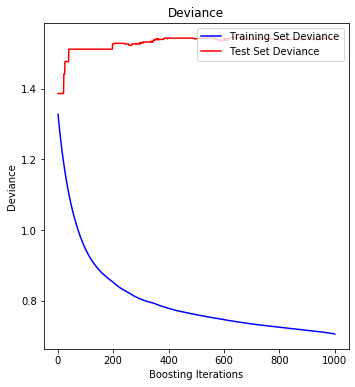

In [56]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(x_test_scaled)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')


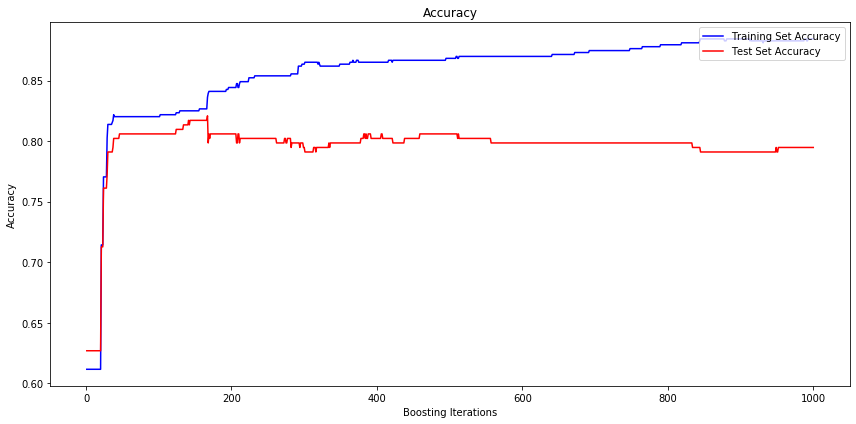

In [35]:
train_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict(x_train_scaled)):
    train_score[i] = accuracy_score(y_train, y_pred)

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict(x_test_scaled)):
    test_score[i] = accuracy_score(y_test, y_pred)
    
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.title('Accuracy') # Binomial deviance loss function for binary classification
plt.plot(np.arange(params['n_estimators']) + 1, train_score, 'b-', label='Training Set Accuracy')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Accuracy')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Accuracy')
fig.tight_layout()
plt.show()

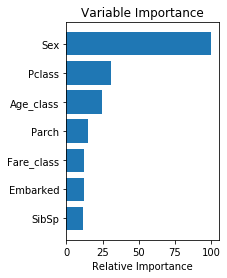

In [32]:
# Plot feature importance
feature_importance = clf.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, ALL_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## (4) KNN (Supervised > Classification)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

model4 = KNeighborsClassifier() 
model4.fit(x_train_scaled, y_train)

pred_test = model.predict_proba(x_test_scaled) 

print('Accuracy KNN Test: ', accuracy_score(model4.predict(x_test_scaled), y_test))

Accuracy KNN Test:  0.8022388059701493


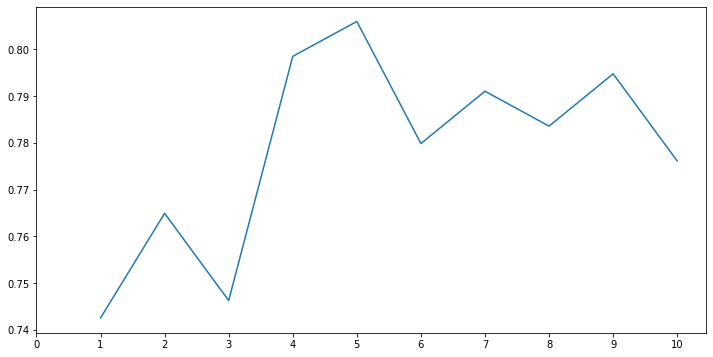

Accuracy of different :  [0.74253731 0.76492537 0.74626866 0.79850746 0.80597015 0.77985075
 0.79104478 0.78358209 0.79477612 0.7761194 ] with the max value as  0.8059701492537313


In [50]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    a=a.append(pd.Series(accuracy_score(prediction,y_test)))
plt.plot(a_index,a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracy of different : ',a.values,'with the max value as ',a.values.max())